In [193]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
import keras
from keras import models, optimizers, applications, Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, History, EarlyStopping
from keras.layers import Flatten, Dense, Dropout
from keras.utils import to_categorical, normalize

In [28]:
epochs = 10
trainPath = "train.csv"
testPath = "test.csv"

In [3]:
trainData = pd.read_csv(trainPath)
trainData

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
testData = pd.read_csv(testPath)
testData

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,252,20,0,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Test df for empty values

In [7]:
print(trainData.isnull().values.any())
print(testData.isnull().values.any())

False
False
False


Text(0.5, 1.0, 'Train data labels amount')

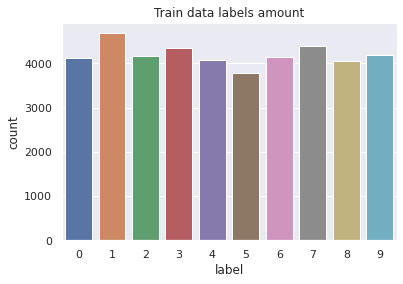

In [8]:
sns.set(style="darkgrid")
sns.countplot(x="label", data=trainData).set_title("Train data labels amount")

Text(0.5, 1.0, 'Test data labels amount')

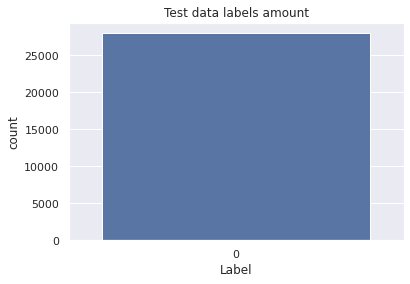

In [ ]:
sns.countplot(x="Label", data=submissionData).set_title("Test data labels amount")

In [196]:
labelData = trainData["label"]
data = trainData.drop("label", axis=1)
x_train = data[:int(data.shape[0]*0.8)]
y_train = labelData[:int(labelData.shape[0]*0.8)]
x_test = data[int(data.shape[0]*0.8):]
y_test = labelData[int(labelData.shape[0]*0.8):]

In [14]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [16]:
x_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
33600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33603,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
y_test.head()

33600    0
33601    7
33602    7
33603    2
33604    2
Name: label, dtype: int64

In [197]:
x_train = x_train.to_numpy().reshape(-1, 28, 28, 1)
x_test = x_test.to_numpy().reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train.to_numpy())
y_test = to_categorical(y_test.to_numpy())

In [162]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 10), (8400, 10))

In [199]:
x_train = normalize(x_train)
x_test = normalize(x_test)

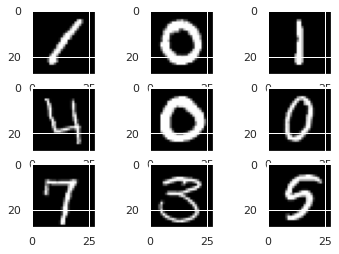

In [198]:
fig = plt.figure()

for idx in range(9):
    ax = fig.add_subplot(3, 3, idx+1)
    ax.imshow(x_train[idx, :,:, 0], cmap="gray")

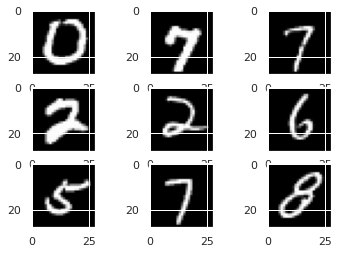

In [24]:
fig = plt.figure()

for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    ax.imshow(x_test[i, :,:, 0], cmap="gray")

In [173]:
datagen = ImageDataGenerator(
    zoom_range = 0.1,
    height_shift_range = 0.1,
    width_shift_range = 0.1,
    rotation_range = 20
)

In [73]:
reduceLearningRate = ReduceLROnPlateau(monitor="loss", factor=0.1, patience=2, 
                                       cooldown=2, min_lr=0.001, verbose=1)
earlyStop = EarlyStopping(monitor="val_loss", patience=5, verbose=1)
callbacks = [reduceLearningRate, earlyStop]

In [228]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", 
          optimizer="adam", metrics=["accuracy"])
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32), 
                              validation_data=datagen.flow(x_test, y_test, batch_size=16),
                              callbacks=callbacks, epochs=epochs, verbose=1)

Epoch 1/10
1050/1050 [==============================] - 31s 30ms/step - loss: 0.6752 - accuracy: 0.7774 - val_loss: 0.3616 - val_accuracy: 0.8939
Epoch 2/10
1050/1050 [==============================] - 31s 30ms/step - loss: 0.4020 - accuracy: 0.8729 - val_loss: 0.1250 - val_accuracy: 0.9151
Epoch 3/10
1050/1050 [==============================] - 31s 30ms/step - loss: 0.3437 - accuracy: 0.8941 - val_loss: 0.1485 - val_accuracy: 0.9212
Epoch 4/10
1050/1050 [==============================] - 31s 30ms/step - loss: 0.3231 - accuracy: 0.8995 - val_loss: 0.0470 - val_accuracy: 0.9285
Epoch 5/10
1050/1050 [==============================] - 32s 30ms/step - loss: 0.3010 - accuracy: 0.9068 - val_loss: 0.1972 - val_accuracy: 0.9282
Epoch 6/10
1050/1050 [==============================] - 32s 30ms/step - loss: 0.2891 - accuracy: 0.9104 - val_loss: 0.1050 - val_accuracy: 0.9358
Epoch 7/10
1050/1050 [==============================] - 32s 30ms/step - loss: 0.2851 - accuracy: 0.9129 - val_loss: 0.1051 -

In [229]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])

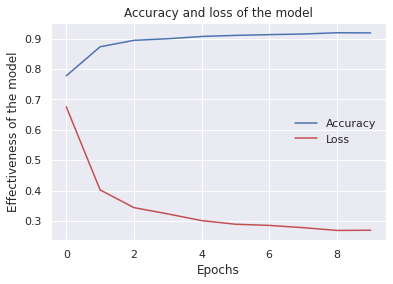

In [232]:
plt.plot(history.history["accuracy"], color="b", label="Accuracy")
plt.plot(history.history["loss"], color="r", label="Loss")
plt.legend(loc="best", frameon=False)
plt.title("Accuracy and loss of the model")
plt.xlabel("Epochs")
plt.ylabel("Effectiveness of the model")
plt.show()

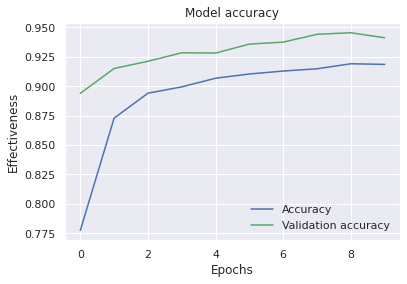

In [237]:
plt.plot(history.history["accuracy"], color="b", label="Accuracy")
plt.plot(history.history["val_accuracy"], color="g", label="Validation accuracy")
plt.legend(loc="lower right", frameon=False)
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Effectiveness")
plt.show()

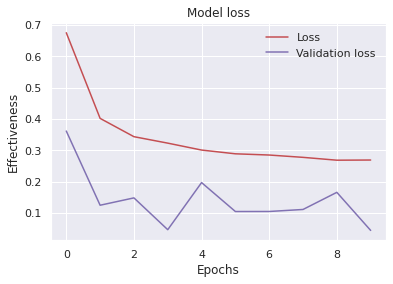

In [239]:
plt.plot(history.history["loss"], color="r", label="Loss")
plt.plot(history.history["val_loss"], color="m", label="Validation loss")
plt.title("Model loss")
plt.legend(loc="upper right", frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Effectiveness")
plt.show()

In [231]:
lossValue, accuracyValue = model.evaluate(x_test, y_test)
lossValue, accuracyValue

8400/8400 [==============================] - 1s 109us/step


(0.10810978458573421, 0.9676190614700317)

In [179]:
x_validation = testData.to_numpy().reshape(-1, 28, 28, 1)

In [243]:
predictions = model.predict(x_validation)
predictions

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

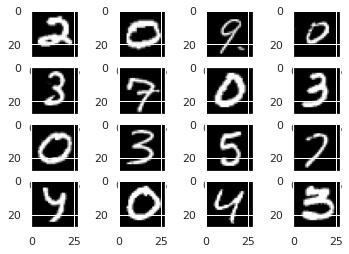

In [244]:
fig = plt.figure()

for i in range(16):
  ax = fig.add_subplot(4, 4, i+1)
  ax.imshow(x_validation[i, :, :, 0], cmap="gray")

In [245]:
for i in range(16):
    print(np.argmax(predictions[i]))

2
0
9
0
3
7
0
3
0
3
5
7
4
0
4
3


In [240]:
predictions = model.predict(x_test)
predictions

array([[1.0000000e+00, 2.2442094e-23, 2.7563295e-13, ..., 3.9091333e-15,
        5.4025217e-17, 1.0571372e-12],
       [6.1078235e-06, 2.8373680e-07, 7.4021483e-04, ..., 9.9882323e-01,
        5.1865623e-05, 2.0424940e-04],
       [2.3341884e-10, 2.3365808e-06, 2.1616283e-05, ..., 9.9996734e-01,
        2.7232156e-08, 8.2561282e-06],
       ...,
       [7.3610114e-09, 2.0522828e-09, 4.7883492e-05, ..., 9.9994791e-01,
        1.8380851e-07, 3.5285950e-06],
       [3.4969890e-08, 1.4119678e-09, 1.6105859e-07, ..., 1.7396052e-12,
        7.6802253e-09, 3.5887335e-10],
       [5.2637046e-05, 5.0463777e-06, 8.9620007e-04, ..., 4.2634100e-02,
        5.3796038e-04, 9.2958713e-01]], dtype=float32)

In [241]:
accuracy = 0
for i in range(len(y_test)):
  if np.argmax(predictions[i]) == np.argmax(y_test[i]):
    accuracy += 1
  
print(f"Accuracy is: {accuracy/len(y_test)*100:.2f}%")

Accuracy is: 96.76%
